
სტუდენტების სია:
ID: 1, სქესი: male, მათემატიკა: 72
ID: 2, სქესი: female, მათემატიკა: 90
ID: 3, სქესი: male, მათემატიკა: 65
ID: 4, სქესი: male, მათემატიკა: 77
ID: 5, სქესი: ტატო, მათემატიკა: 90

ახალი სტუდენტის დამატება:


სქესი (male/female):  male
მათემატიკის ქულა (0-100):  99
კითხვის ქულა (0-100):  1
წერის ქულა (0-100):  1


სტუდენტი დაემატა!



შეიყვანეთ სტუდენტის ID:  82568125610
ახალი მათემატიკის ქულა:  100


ქულა განახლებულია!


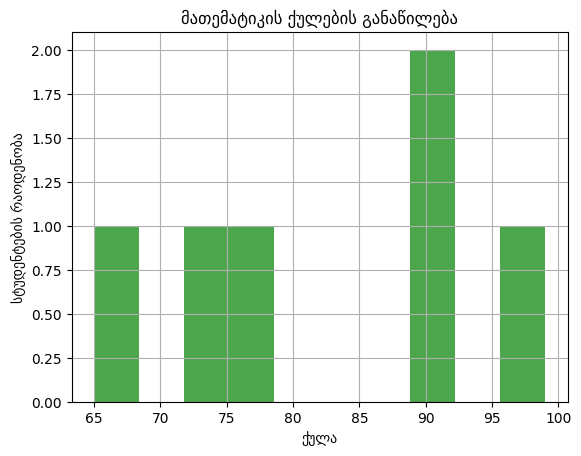

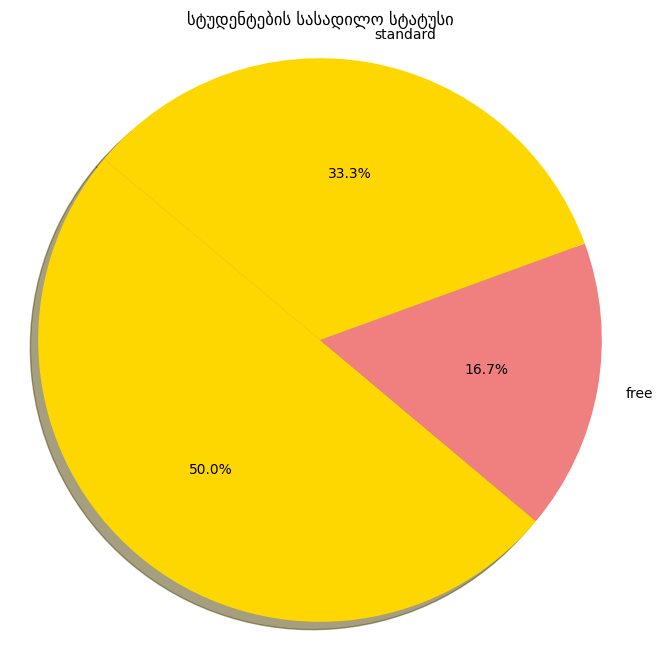


მუშაობა დასრულებულია!


In [2]:
# 1. ბიბლიოთეკების შემოტანა
import sqlite3
import matplotlib.pyplot as plt

# 2. ბაზის შექმნა და კავშირის დამყარება
conn = sqlite3.connect('students.db')
cursor = conn.cursor()

# 3. ცხრილის შექმნა (თუ არ არსებობს)
cursor.execute("""
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    gender TEXT,
    race TEXT,
    parent_education TEXT,
    lunch TEXT,
    math_score INTEGER,
    reading_score INTEGER,
    writing_score INTEGER
)
""")

# 4. ტესტური მონაცემების დამატება (თუ ცხრილი ცარიელია)
cursor.execute("SELECT COUNT(*) FROM students")
if cursor.fetchone()[0] == 0:
    # დემო მონაცემების დამატება
    test_data = [
        ('male', 'group A', 'bachelor', 'standard', 72, 72, 74),
        ('female', 'group B', 'master', 'free', 90, 95, 93),
        ('male', 'group C', 'college', 'standard', 65, 70, 68)
    ]
    
    for data in test_data:
        cursor.execute("""
        INSERT INTO students 
        (gender, race, parent_education, lunch, math_score, reading_score, writing_score)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        """, data)
    conn.commit()
    print("ტესტური მონაცემები დამატებულია!")

# 5. მონაცემთა წაკითხვა
def show_students():
    cursor.execute("SELECT * FROM students")
    print("\nსტუდენტების სია:")
    for row in cursor.fetchall():
        print(f"ID: {row[0]}, სქესი: {row[1]}, მათემატიკა: {row[5]}")

show_students()

# 6. ახალი სტუდენტის დამატება
def add_student():
    print("\nახალი სტუდენტის დამატება:")
    gender = input("სქესი (male/female): ")
    math = int(input("მათემატიკის ქულა (0-100): "))
    reading = int(input("კითხვის ქულა (0-100): "))
    writing = int(input("წერის ქულა (0-100): "))
    
    cursor.execute("""
    INSERT INTO students 
    (gender, math_score, reading_score, writing_score) 
    VALUES (?, ?, ?, ?)
    """, (gender, math, reading, writing))
    conn.commit()
    print("სტუდენტი დაემატა!")

add_student()

# 7. ქულების განახლება
def update_score():
    student_id = input("\nშეიყვანეთ სტუდენტის ID: ")
    new_math = input("ახალი მათემატიკის ქულა: ")
    
    cursor.execute("""
    UPDATE students 
    SET math_score = ? 
    WHERE id = ?
    """, (new_math, student_id))
    conn.commit()
    print("ქულა განახლებულია!")

update_score()

# 8. ვიზუალიზაცია
def show_math_scores():
    cursor.execute("SELECT math_score FROM students")
    scores = [row[0] for row in cursor.fetchall()]
    
    plt.hist(scores, bins=10, color='green', alpha=0.7)
    plt.title("მათემატიკის ქულების განაწილება")
    plt.xlabel("ქულა")
    plt.ylabel("სტუდენტების რაოდენობა")
    plt.grid(True)
    plt.show()

show_math_scores()
# დიაგრამა 3: პაი დიაგრამა - სასადილო სტატუსის განაწილება
# აჩვენებს სტუდენტების პროცენტულ განაწილებას
cursor.execute("SELECT lunch, COUNT(*) FROM students GROUP BY lunch")
lunch_data = cursor.fetchall()

labels = [row[0] for row in lunch_data]
sizes = [row[1] for row in lunch_data]
colors = ['gold', 'lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('სტუდენტების სასადილო სტატუსი')
plt.axis('equal')
plt.show()

# 9. კავშირის დასრულება
conn.close()
print("\nმუშაობა დასრულებულია!")